<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#We-All-Make-Mistakes" data-toc-modified-id="We-All-Make-Mistakes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>We All Make Mistakes</a></span><ul class="toc-item"><li><span><a href="#Getting-it-Right-vs-Getting-it-Wrong" data-toc-modified-id="Getting-it-Right-vs-Getting-it-Wrong-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Getting it Right vs Getting it Wrong</a></span></li><li><span><a href="#False-Positives---Type-1-Errors" data-toc-modified-id="False-Positives---Type-1-Errors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>False Positives - Type 1 Errors</a></span></li><li><span><a href="#False-Negatives---Type-2-Errors" data-toc-modified-id="False-Negatives---Type-2-Errors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>False Negatives - Type 2 Errors</a></span></li><li><span><a href="#Visualizing-The-Errors" data-toc-modified-id="Visualizing-The-Errors-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizing The Errors</a></span></li></ul></li><li><span><a href="#When-Things-Aren't-Normal:-$t$-Tests" data-toc-modified-id="When-Things-Aren't-Normal:-$t$-Tests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>When Things Aren't Normal: $t$-Tests</a></span><ul class="toc-item"><li><span><a href="#$z$-tests-vs-$t$-tests" data-toc-modified-id="$z$-tests-vs-$t$-tests-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>$z$-tests vs $t$-tests</a></span></li><li><span><a href="#Compare-and-contrast-$z$-tests-and-$t$-tests." data-toc-modified-id="Compare-and-contrast-$z$-tests-and-$t$-tests.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compare and contrast $z$-tests and $t$-tests.</a></span></li><li><span><a href="#Performing-a-$t$-Test" data-toc-modified-id="Performing-a-$t$-Test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Performing a $t$-Test</a></span><ul class="toc-item"><li><span><a href="#An-Alternative-Method-in-Making-a-Decision" data-toc-modified-id="An-Alternative-Method-in-Making-a-Decision-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>An Alternative Method in Making a Decision</a></span></li></ul></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises</a></span><ul class="toc-item"><li><span><a href="#Gotta-Have-My-Coffee!-☕️" data-toc-modified-id="Gotta-Have-My-Coffee!-☕️-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gotta Have My Coffee! ☕️</a></span></li><li><span><a href="#Gotta-Have-My-Pants!-👖" data-toc-modified-id="Gotta-Have-My-Pants!-👖-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gotta Have My Pants! 👖</a></span></li><li><span><a href="#Gotta-Have-My-Food-Delivered!-🚚" data-toc-modified-id="Gotta-Have-My-Food-Delivered!-🚚-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gotta Have My Food Delivered! 🚚</a></span></li></ul></li><li><span><a href="#Level-Up:-More-practice-problems!" data-toc-modified-id="Level-Up:-More-practice-problems!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Level Up: More practice problems!</a></span></li><li><span><a href="#Level-Up:--Two-sample-$t$-tests" data-toc-modified-id="Level-Up:--Two-sample-$t$-tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level Up:  Two sample $t$-tests</a></span></li></ul></div>

In [1]:
from locale import normalize

from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Objectives

- Understand how type 1 & type 2 errors can be made in hypothesis tests
- Perform a Student's t-test and interpret the results

## Z Test Criteria

- The sample size is greater than 30.
- The population standard deviation is known.
- The data should be normally distributed.

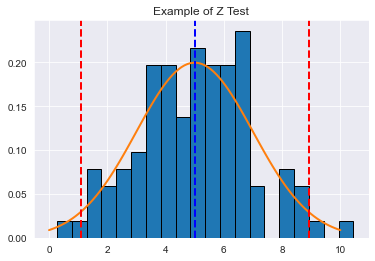

In [17]:
mu = 5
sigma = 2
n = 100

data = stats.norm(mu, sigma).rvs(n)
plt.title("Example of Z Test")
plt.hist(data, bins=20, edgecolor='black', density=True)
plt.plot(np.linspace(0, 10, 100), stats.norm(mu, sigma).pdf(np.linspace(0, 10, 100)), lw=2)
plt.axvline(np.mean(data), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(stats.norm(mu, sigma).ppf(0.025), color='red', linestyle='dashed', linewidth=2)
plt.axvline(stats.norm(mu, sigma).ppf(0.975), color='red', linestyle='dashed', linewidth=2)
plt.show()

# We All Make Mistakes

Statistics is a field of imperfect knowledge: we don't know the **_truth_**, we use what we know.

We make mistakes ¯\\\_(ツ)\_/¯ <!--markdown shrug-->

But it's important to know what _kind of mistakes_ we're making in our process and recognize how _frequently_ we might make those mistakes.

## Getting it Right vs Getting it Wrong

It would help if we go over some terminology to help us discuss this types of errors.

----------------------------------------

When we get it **right** we have **true positives** & **true negatives**. These correspond with _rejecting the null hypothesis_ and _failing to reject the null hypothesis_.

In either situation, it means our conclusion agrees with the "truth".

----------------------------------------

When we get it **wrong** we either have a **false positive** or a **false negative**. These are the errors we care about.

## False Positives - Type 1 Errors

**False positives** are **type 1 errors** and occur when we _reject the null hypothesis_ (favoring the alternative hypothesis) but the "truth" is that we should have _failed to reject_ (favoring the null hypothesis).

We can get these errors by random chance and are associated with _finding an effect_ when one doesn't exist. We can expect this to happen if we perform many tests where there is no effect.

<img src='https://imgs.xkcd.com/comics/significant.png' width=400px/>

So what's a decent tolerance of error? Usually at rate between $1\%$ and $5\%$ but it depends on the specific experiment.

We actually define our tolerance with something we're already familiar with, the significance level $\alpha$

## False Negatives - Type 2 Errors

**False negatives** are **type 2 errors** and occur when we _fail to reject the null hypothesis_ (favoring the null hypothesis) but the "truth" is that we should have _rejected the hypothesis_ (favoring the alternative hypothesis).

This can happen again randomly but usually a symptom of not having a "good enough" experiment to notice an effect. We're likely to fail to reject $H_0$ if we don't have enough samples and/or the effect is relatively small.

This error can be denoted with $\beta$ but typically it's talked about in terms of **statistical power** ($1-\beta$) which we'll see later. Note that we want $\beta$ to be small, but statistical power to be high (they're complements of another)

Generally, we want our false negative rate $\beta$ to be about $20\%$ but again it depends on the application.

## Visualizing The Errors

We can think of a hypothesis test as comparing two normal distributions (or $t$-distributions or whichever test we're doing). 

There's the sample's distribution and the comparison's distribution given by the null hypothesis (which is the population in a one-sample test).

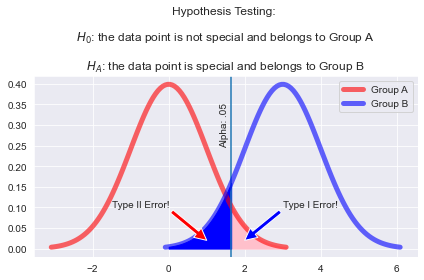

In [2]:
# Visulization of two samples being compared with one another
fig, ax = plt.subplots()

y = np.linspace(stats.norm(0, 1).ppf(0.001),
             stats.norm(0, 1).ppf(0.999), 100)

alpha = stats.norm(0, 1).ppf(0.95)


ax.plot(y, stats.norm(0, 1).pdf(y), 'r-', lw=5, alpha=0.6, label='Group A')
ax.axvline(alpha)

px = np.arange(stats.norm(0, 1).ppf(0.95), stats.norm(0, 1).ppf(0.999), 0.001)
ax.fill_between(px, stats.norm(0, 1).pdf(px), color = 'pink')



x = np.linspace(stats.norm(3, 1).ppf(0.001),
             stats.norm(3, 1).ppf(0.999), 100)

ax.plot(x, stats.norm(3, 1).pdf(x), 'b-', lw=5, alpha=0.6, label='Group B')


px = np.arange(stats.norm(0, 1).ppf(0.5),stats.norm(0, 1).ppf(0.95), 0.001)
ax.fill_between(px, stats.norm(3, 1).pdf(px), color='blue')
ax.legend(loc='upper right')

ax.set_title("""Hypothesis Testing: \n
$H_0$: the data point is not special and belongs to Group A \n
$H_A$: the data point is special and belongs to Group B """)
ax.text(1.35, 0.25, 'Alpha: .05', rotation=90)

ax.annotate('Type I Error!', xy=(2, 0.02),
            xytext=(3, 0.1), arrowprops={'facecolor': 'blue'})
ax.annotate('Type II Error!', xy=(1, 0.02),
            xytext=(-1.5, 0.1), arrowprops={'facecolor': 'red'})

plt.tight_layout()

We can visualize these two distributions as where we might expect our sample mean to be measured at.

Sometimes we might measure an extreme value in our first sample which will be interpreted as a small p-value (too weird to be part of the comparison distribution) resulting into a _type 1 error_.

# When Things Aren't Normal: $t$-Tests

## $z$-tests vs $t$-tests

We'll typically assume that our continuous variables come from normal distributions. But if we have a small sample size or don't know the population standard deviation, we have to make a *correction* to  the normal distribution. This is what the $t$-test effectively does for us by using a $t$-distribution over the normal distribution.


We use a T-distribution when we don't know the population standard deviation and have a small sample size. This is because as a sample gets smaller the data has more uncertainty therefore, we need to use a distribution that has more uncertainty in the tails.

As we saw from a previous lecture, the $t$-distribution changes based on the degrees of freedom (number of data point in the sample). As the number of points increase, we approach the normal distribution.

<img src="images/z_or_t_test.png" width="500">

**So what's the difference?** → A $t$-test is like a modified $z$-test. 

> **$t$-test**:
> 
> - Calculate the **$t$-statistic** using the sample's standard deviation $s$:
> $$\large t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
> - We calculate the p-value from the **$t$-distribution**

> **$z$-test**:
> 
> - Calculate the **$z$-statistic** using the populations standard deviation $\sigma$:
> $$\large z = \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$$
> - We calculate the p-value from the **normal distribution**


<img src="images/img5.png" width="500">

## Compare and contrast $z$-tests and $t$-tests. 

In both cases, it is assumed that the samples are normally distributed. 

$t$-distributions have more probability in the tails. As the sample size increases, this decreases and the t distribution more closely resembles the $z$, or standard normal, distribution. By sample size $n = 1000$ they are virtually indistinguishable from each other. 

As the degrees of freedom go up, the $t$-distribution gets closer to the normal curve.

After calculating our $t$-stat, we compare it against our $t$-critical value determined by our predetermined alpha and the degrees of freedom.

Degrees of freedom = n - 1

In [18]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns nan
          * 'raise': throws a

## Performing a $t$-Test

> **Scenario**
>
> - We are told that African elephants have weights distributed normally around a mean of $9000$ lbs. 
> - Pachyderm Adventures has recently measured the weights of $20$ African elephants in Gabon  
> - This group of Gabonese elephants were measured to have an average weight at $8562$ lbs. 
>
> The claim is that these Gabonese elephants are significantly different. Let's find out!

Because the sample size is small, we need to use a one sample $t$-test. 



$H_0$: _There is no difference between the Gabonese elephants and the African elephants population_

$H_1$: _There is a difference between the Gabonese elephants and the African elephants population_

Let's define our $\alpha$ to be $0.05$

In [19]:
# We're given these values from the sample
gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601, 
        8559, 8228, 8474, 8708, 8128
])

In [20]:
print(f'Sample mean: {np.mean(gab):.1f}')
print(f'Sample std: {np.std(gab):.1f}')

Sample mean: 8562.0
Sample std: 288.7


In [21]:
# Using Python to perform test
result = stats.ttest_1samp(gab, 9000)
t_stat, p_value = result
result

Ttest_1sampResult(statistic=-6.614120615780001, pvalue=2.498214901380137e-06)

So, yes, we can very confidently reject our null hypothesis since the p-value is smaller than our $\alpha$.

### An Alternative Method in Making a Decision

We used SciPy above to calculate our $t$-value and ultimately our p-value from the $t$-distribution. 

Alternatively, we can convert our significance level $\alpha$ using the $t$-distribution to get our **critical value $t^*$**. We then can compare $t^*$ with our $t$-statistic to determine if it's significant.

In [31]:
# Let's continue to assume our alpha is 0.05
x_bar = 8562
mu = 9000
sample_std = np.std(gab)
n = 20

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n))
t_stat

-6.785944569870411

In [33]:
# Calculate our t-critical value t*
critical_value = stats.t.ppf(0.05, n-1)
critical_value

-1.7291328115213678

In [34]:
abs(t_stat) > abs(critical_value)

True

We can again confidently reject our null hypothesis since the absolute value of our $t$-statistic is larger than that of our critical value $t^*$.

# Exercises

## Gotta Have My Coffee! ☕️

A coffee shop relocates from Manhattan to Brooklyn and wants to make sure that all lattes are consistent before and after their move. They buy a new machine and hire a new barista. In Manhattan, lattes are made with 4 oz of espresso. A random sample of 25 lattes made in their new store in Brooklyn shows a mean of 4.6 oz and standard deviation of 0.22 oz. Are their lattes different now that they've relocated to Brooklyn? Use a significance level of $\alpha = 0.01$.

**State the null and alternative hypotheses**

    Null: Lattes contain the same amount of espresso in Manhattan and Brooklyn.
    Alternative: Lattes contain different amounts of espresso in Manhattan and Brooklyn.

<details>
    <summary>Answer</summary>
Null: The Brooklyn lattes are not different in size from the Manhattan lattes. <br/>
Alternative: The Brooklyn lattes are different in size from the Manhattan lattes.
    </details>

**Perform the test.**

In [43]:
distribution = stats.t(df=24)
t_critical = distribution.ppf(0.995)
t_statistic = (4.6 - 4) / (0.22 / np.sqrt(25))
p_value_coffee = distribution.sf(t_statistic) if t_statistic > 0 else distribution.cdf(t_statistic)
t_critical, t_statistic, p_value_coffee

(2.796939504772804, 13.63636363636363, 4.242714627951655e-13)

<details>
    <summary>Answer</summary>
    <code>t_stat = (4.6 - 4) / (0.22 / np.sqrt(25))
# This is a two-tailed test, so we want 1/2 of the 1% for
# the right tail and 1/2 for the left tail.
t_crit = stats.t.ppf(0.995, df=24)
print("t-statistic: ", t_stat)
print("critical t-value: ", t_crit)
print("p-value: ", stats.t(df=24).sf(t_stat))</code>
    </details>

**Make a decision**

    Reject the null hypothesis because the p-value is less than 1%. So the Brooklyn lattes are different!

<details>
    <summary>Answer</summary>
    Because the p-value is lower than our threshold of 1% (or, equivalently, because our t-statistic is larger than the critical t-statistic), we should reject the null hypothesis. The Brooklyn lattes are different!
    </details>

## Gotta Have My Pants! 👖

I'm buying jeans from Pants-a-torium. I know nothing about their inventory other than prices after looking at some random jean prices: 

``` python
[20, 30, 30, 50, 75, 25, 30, 30, 40, 80]
```
However, I know that my typical pants store (Pants-R-Us) sells jeans at an average price of \\$58 with a standard deviation of \\$18. (Yes, I do descriptive statistics while I shop. Why do you ask?)

Should I go just to one store for a less expensive pair of jeans? I'm pretty apprehensive about my decision, so $\alpha = 0.1$.

**State the null and alternative hypotheses**

    Null: The pants at Pants-a-torium are not cheaper than the pants at Pants-R-Us.
    Alternative: The pants at Pants-a-torium are cheaper than the pants at Pants-R-Us.

<details>
    <summary>Answer</summary>
    Null: The pants at Pants-a-torium are not cheaper than the pants at Pants-R-Us.
    Alternative: The pants at Pants-a-torium are cheaper than the pants at Pants-R-Us.
    </details>

**Perform the test.**

In [50]:
sample = [20, 30, 30, 50, 75, 25, 30, 30, 40, 80]
t_statistic, p_value = stats.ttest_1samp(a=sample, popmean=58)
t_statistic, p_value/2

(-2.56934288148538, 0.015110178147891276)

<details>
    <summary>Answer</summary>
    <code>pantsatorium = [20, 30, 30, 50, 75, 25, 30, 30, 40, 80]
stats.ttest_1samp(a=pantsatorium, popmean=58)</code>
</details>

**Make a decision.**

    Reject the null hypothesis because the p-value is less than 10%. So the pants at Pants-a-torium are cheaper!

<details>
    <summary>Answer</summary>
The p-value is smaller than our critical level of 10%, so we'll reject the null!
    </details>

## Gotta Have My Food Delivered! 🚚

You measure the delivery times of ten different restaurants in two different neighborhoods. You want to know if restaurants in the different neighborhoods have the same delivery times. Set your significance threshold to 0.05. 

We measured this for neighborhood A: 

``` python
delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
```

For neighborhood B, someone already reported the values as a mean time of 26.8 minutes and a standard deviation of 2.6 minutes.


**State the null and alternative hypotheses.**

    Null: The delivery times for the restaurants in Neighborhood A are the same as the times for the restaurants in Neighborhood B.
    Alternative: The delivery times for the restaurants in Neighborhood A are NOT the same as the times for the restaurants in  Neighborhood B.

<details>
    <summary>Answer</summary>
Null: The delivery times for the restaurants in Neighborhood A are the same as the times for the restaurants in Neighborhood B. <br/>
Alternative: The delivery times for the restaurants in Neighborhood A are NOT the same as the times for the restaurants in  Neighborhood B.
    <details>

**Perform the test.**

<details>
    <summary>Answer</summary>
    This is a TWO-SAMPLE problem. So we'll use stats.ttest_ind_from_stats(). The two sets don't have exactly the same variance, so we'll perform Welch's test by setting the equal_var parameter to False. <br/>
    <code>delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
mean_A = np.mean(delivery_times_A)
std_A = np.std(delivery_times_A)
nobs_A = len(delivery_times_A)
mean_B = 26.8
std_B = 2.6
nobs_B = 10
stats.ttest_ind_from_stats(mean1=mean_A, std1=std_A, nobs1=nobs_A,
                          mean2=mean_B, std2=std_B, nobs2=nobs_B,
        equal_var=False)</code>
</details>

**Make a decision.**

<details>
    <summary>Answer</summary>
    The p-value is greater than our threshold value of 5%, so we can't reject the null hypothesis that the two neighborhoods have the same restaurant delivery times.
    </details>

# Level Up: More practice problems!

1. A rental car company claims the mean time to rent a car on their website is 60 seconds with a standard deviation of 30 seconds. A random sample of 36 customers attempted to rent a car on the website. The mean time to rent was 75 seconds. Is this enough evidence to contradict the company's claim at a significance level of $\alpha = 0.05$? 

Null hypothesis:

Alternative hypothesis:


<details>
    <summary>Answer</summary>
    Null: The customers' rent time is not different from what the company claims.
    Alternative: The customers' rent time is different from what the company claims.
    </details>

In [ ]:
# one-sample z-test 


<details>
    <summary>Answer</summary>
<code>z_stat = (75 - 60) / (30 / np.sqrt(36))
stats.norm.cdf(z_stat)</code>
    </details>

Reject?:

<details>
    <summary>Answer</summary>
    Yes, reject the null hypothesis! The p-value is less than our threshold of 5%.
    </details>

2. Consider the gain in weight (in grams) of 19 female rats between 28 and 84 days after birth. 

Twelve rats were fed on a high-protein diet and seven rats were fed on a low-protein diet.

``` python
high_protein = [134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123]
low_protein = [70, 118, 101, 85, 107, 132, 94]
```

Is there any difference in the weight gain of rats fed on high protein diet vs low protein diet? It's OK to assume equal sample variances. 

Null and alternative hypotheses? 

> null: 

> alternative: 

<details>
    <summary>Answer</summary>
    Null: The rats with the high-protein diet and the rats with the low-protein diet had the same weight gain. <br/>
    Alternative: The rats with the high-protein diet and the rats with the low-protein diet did not have the same weight gain.
    </details>

What kind of test should we perform and why? 

> Test:

<details>
    <summary>Answer</summary>
    Two-sample two-tailed t-test, since we have small sample sizes. See the Level-Up section below!
    </details>

Perform the test. Do we reject the null hypothesis?

<details>
    <summary>Answer</summary>
<code>high_protein = [134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123]
low_protein = [70, 118, 101, 85, 107, 132, 94]
stats.ttest_ind(a=high_protein, b=low_protein)</code>

We fail to reject the null hypothesis at a significance level of $\alpha = 0.05$.
    </details>

**What if we wanted to test if the rats who ate a high-protein diet gained *more* weight than those who ate a low-protein diet?**

Null:

alternative:

<details>
    <summary>Answer</summary>
    Null: The rats with the high-protein diet did not gain more weight than the rats with the low-protein diet. <br/>
    Alternative: The rats with the high-protein diet gained more weight than the rats with the low-protein diet.

Kind of test? 

<details>
    <summary>Answer</summary>
    Now we need a two-sample ONE-tailed test.
    </details>

Critical test statistic value? 

<details>
    <summary>Answer</summary>
    <code>h_bar = np.mean(high_protein)
l_bar = np.mean(low_protein)
h_df = len(high_protein) - 1
l_df = len(low_protein) - 1
pooled_var = (h_df*np.var(high_protein) + l_df*np.var(low_protein)) / (h_df + l_df)
t_stat = (h_bar - l_bar) / np.sqrt(pooled_var * (1/len(high_protein) + 1/len(low_protein)))
t_stat</code>
    </details>

Can we reject?

<details>
    <summary>Answer</summary>
    <code>stats.t(df=h_df+l_df).cdf(t_stat)</code>
    
    Yes, we can reject the null hypothesis!
    </details>

# Level Up:  Two-sample $t$-tests

Sometimes, we are interested in determining whether two population means are equal. In this case, we use two-sample $t$-tests.

There are two types of two-sample t-tests: **paired** and **independent** (unpaired) tests. 

What's the difference?  

**Paired tests**: How is a sample affected by a certain treatment? The individuals in the sample remain the same and you compare how they change after treatment. 

**Independent tests**: When we compare two different, unrelated samples to each other, we use an independent (or unpaired) two-sample t-test.

The test statistic for an unpaired two-sample t-test is slightly different than the test statistic for the one-sample $t$-test. 

Assuming equal variances, the test statistic for a two-sample $t$-test is given by: 

$$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$$

where $s^2$ is the pooled sample variance, 

$$ s^2 = \frac{\sum_{i=1}^{n_1} \left(x_i - \bar{x_1}\right)^2 + \sum_{j=1}^{n_2} \left(x_j - \bar{x_2}\right)^2 }{n_1 + n_2 - 2} $$

Here, $n_1$ is the sample size of sample 1 and $n_2$ is the sample size of sample 2. 

An independent two-sample $t$-test for samples of size $n_1$ and $n_2$ has $(n_1 + n_2 - 2)$ degrees of freedom. 

Now let's say we want to compare our Gabonese elephants to a sample of elephants from Kenya. 

In [51]:
ken = [8762, 8880, 8743, 8901,
        8252, 8966, 8369, 9001,
         8857, 8147, 8927, 9005,
         9083, 8477, 8760, 8915,
         8927, 8829, 8579, 9002]


print(np.std(ken))
print(np.std(gab))

259.79701691897856
288.65481114992696


In [52]:
# so

x_1 = np.mean(gab)
x_2 = np.mean(ken)
s_1_2 = np.var(gab, ddof = 1)
s_2_2 = np.var(ken, ddof = 1)
n_1 = len(gab)
n_2 = len(ken)
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)

t = (x_1 - x_2)/np.sqrt(s_p_2*(1/n_1 + 1/n_2))
t

-2.324518788074487

In [53]:
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)
s_p_2

79376.88947368422

In [54]:
print(s_1_2, s_2_2 )

87706.94736842105 71046.83157894739


In [55]:
stats.ttest_ind(gab, ken, equal_var=False)

Ttest_indResult(statistic=-2.324518788074487, pvalue=0.0256026336210871)